In [101]:
import pandas as pd
import requests
import time
import csv
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

csv_file_path = '/Users/mbouch17/Desktop/IronHack/Labs &  Project/Project-3-Week-3/ready_to_analyse/2000_2249_cleaned_movies_data.csv'
df = pd.read_csv(csv_file_path, encoding='ISO-8859-1')  # Specify encoding

df.head()

,Title,Year_x,Certificate,Duration,Genre_x,Rating,Metascore_x,Director_x,Cast,Votes,...,Plot,Actors,Metascore_y,Director_y,imdbRating,imdbVotes,Awards,Country,Language,BoxOffice
0,The Ides of March,2021.0,A,101.0,"Drama, Thriller",7.1,67.0,George Clooney,"Paul Giamatti, George Clooney, Philip Seymour ...","231,033",...,An idealistic staffer for a new presidential c...,"Paul Giamatti, George Clooney, Philip Seymour ...",67.0,George Clooney,7.1,"232,644",Nominated for 1 Oscar. 9 wins & 36 nominations...,United States,English,"$40,962,534"
1,What Happened to Monday,2021.0,A,123.0,"Action, Crime, Fantasy",6.8,47.0,Tommy Wirkola,"Noomi Rapace, Glenn Close, Willem Dafoe, Marwa...","134,778",...,In a world where families are limited to one c...,"Noomi Rapace, Glenn Close, Willem Dafoe",47.0,Tommy Wirkola,6.8,"136,658",1 nomination,"United Kingdom, France, United States, Belgium",English,NaN
2,Haunted Mansion,2021.0,PG-13,123.0,"Comedy, Drama, Family",6.0,47.0,Justin Simien,"LaKeith Stanfield, Rosario Dawson, Owen Wilson...","43,039",...,"A single mom named Gabbie hires a tour guide, ...","LaKeith Stanfield, Rosario Dawson, Owen Wilson",NaN,Justin Simien,6.0,"44,851",7 nominations,"United States, Canada","English, French, Spanish","$67,653,287"
3,Demolition Man,2021.0,A,115.0,"Action, Sci-Fi, Thriller",6.7,34.0,Marco Brambilla,"Sylvester Stallone, Wesley Snipes, Sandra Bull...","193,725",...,A police officer is brought out of suspended a...,"Sylvester Stallone, Wesley Snipes, Sandra Bullock",34.0,Marco Brambilla,6.7,"196,455",1 win & 7 nominations,United States,English,"$58,055,768"
4,Brightburn,2021.0,A,90.0,"Drama, Horror, Mystery",6.1,44.0,David Yarovesky,"Elizabeth Banks, David Denman, Jackson A. Dunn...","108,055",...,What if a child from another world crash-lande...,"Elizabeth Banks, David Denman, Jackson A. Dunn",44.0,David Yarovesky,6.1,"110,483",1 win & 2 nominations,United States,English,"$17,300,439"


In [145]:
# Step 1: Filter movies from the last 10 years
recent_movies = df[df['Year_x'] >= (pd.Timestamp.now().year - 10)]

# Step 2: Split the genres into separate rows for movies with multiple genres
# Create a new dataframe where each genre for a movie becomes a separate row
recent_movies = recent_movies.assign(Genre_x=recent_movies['Genre_x'].str.split(',')).explode('Genre_x')

# Step 3: Clean up the genre column (remove spaces if necessary)
recent_movies['Genre_x'] = recent_movies['Genre_x'].str.strip()

# Step 4: Convert BoxOffice and imdbVotes to numeric (after removing non-numeric characters)
recent_movies['BoxOffice'] = pd.to_numeric(recent_movies['BoxOffice'].replace('[\$,]', '', regex=True), errors='coerce')
recent_movies['imdbVotes'] = pd.to_numeric(recent_movies['Votes'].replace(',', '', regex=True), errors='coerce')

# Step 5: Group by Genre and calculate average IMDb rating, vote count, and box office earnings
genre_stats = recent_movies.groupby('Genre_x').agg(
    avg_rating=('imdbRating', 'mean'),
    avg_votes=('imdbVotes', 'mean'),
    avg_box_office=('BoxOffice', 'mean')
).reset_index()

# Step 6: Sort the genres by average rating and votes
genre_stats = genre_stats.sort_values(by=['avg_rating', 'avg_votes'], ascending=False)

<>:12: SyntaxWarning: invalid escape sequence '\$'
<>:12: SyntaxWarning: invalid escape sequence '\$'
/var/folders/t2/40gs14tj4lg2536r26vzcyv40000gn/T/ipykernel_36545/106736076.py:12: SyntaxWarning: invalid escape sequence '\$'
  recent_movies['BoxOffice'] = pd.to_numeric(recent_movies['BoxOffice'].replace('[\$,]', '', regex=True), errors='coerce')


In [141]:
# Table 1: Sorted by average rating and vote count (already sorted in previous steps)
print("Table 1: Sorted by Average Rating and Vote Count")
print(genre_stats.round(2))

Table 1: Sorted by Average Rating and Vote Count
      Genre_x  avg_rating  avg_votes  avg_box_office
18    Western        7.40   73715.00    1.005311e+08
3   Biography        7.25  181770.80    2.885787e+07
2   Animation        7.07  222839.33    1.771111e+08
9     History        7.03   37289.67    5.681662e+06
5       Crime        6.75  185175.58    5.911756e+07
6       Drama        6.71  114541.35    3.781909e+07
11      Music        6.60   98629.25    8.528573e+06
13    Mystery        6.59   99550.06    2.858880e+07
16      Sport        6.57   96790.67    4.845736e+07
14    Romance        6.53   92258.30    3.582949e+07
7      Family        6.51  106573.50    1.104231e+08
0      Action        6.46  172428.80    7.041726e+07
12    Musical        6.45   57422.00    3.851861e+07
15     Sci-Fi        6.44  139490.22    4.213600e+07
4      Comedy        6.44  131176.60    8.651252e+07
17   Thriller        6.42  118215.65    3.883342e+07
8     Fantasy        6.41  130142.92    6.671177e+

In [119]:
# Table 2: Sorted by avg_votes in descending order
genre_stats_by_votes = genre_stats.sort_values(by='avg_votes', ascending=False)
print("\nTable 2: Sorted by Average Votes")

genre_stats_by_votes.round(2)


Table 2: Sorted by Average Votes


,Genre_x,avg_rating,avg_votes,avg_box_office
2,Animation,7.07,222839.33,"$177,111,139"
1,Adventure,6.28,194011.48,"$125,013,746"
5,Crime,6.75,185175.58,"$59,117,562"
3,Biography,7.25,181770.80,"$28,857,871"
0,Action,6.46,172428.80,"$70,417,262"
15,Sci-Fi,6.44,139490.22,"$42,135,996"
4,Comedy,6.44,131176.60,"$86,512,516"
8,Fantasy,6.41,130142.92,"$66,711,765"
17,Thriller,6.42,118215.65,"$38,833,418"
6,Drama,6.71,114541.35,"$37,819,091"


In [121]:
# Table 3: Sorted by avg_box_office in descending order
genre_stats_by_box_office = genre_stats.sort_values(by='avg_box_office', ascending=False, key=lambda x: x.str.replace('[$,]', '', regex=True).astype(float))
print("\nTable 3: Sorted by Average Box Office")
genre_stats_by_box_office.round(2)


Table 3: Sorted by Average Box Office


,Genre_x,avg_rating,avg_votes,avg_box_office
2,Animation,7.07,222839.33,"$177,111,139"
1,Adventure,6.28,194011.48,"$125,013,746"
7,Family,6.51,106573.50,"$110,423,133"
18,Western,7.40,73715.00,"$100,531,060"
4,Comedy,6.44,131176.60,"$86,512,516"
0,Action,6.46,172428.80,"$70,417,262"
8,Fantasy,6.41,130142.92,"$66,711,765"
5,Crime,6.75,185175.58,"$59,117,562"
16,Sport,6.57,96790.67,"$48,457,356"
15,Sci-Fi,6.44,139490.22,"$42,135,996"


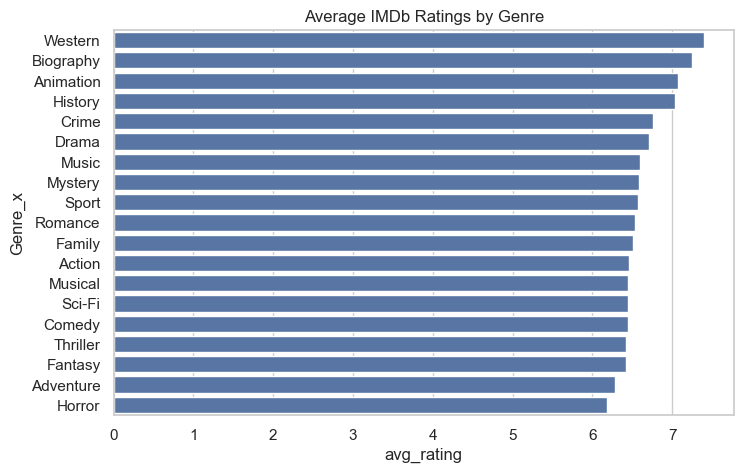

In [179]:
# Plot 1: Average IMDb Ratings by Genre
plt.figure(figsize=(8, 5))
sns.barplot(x='avg_rating', y='Genre_x', data=genre_stats)
plt.title('Average IMDb Ratings by Genre')

plt.show()

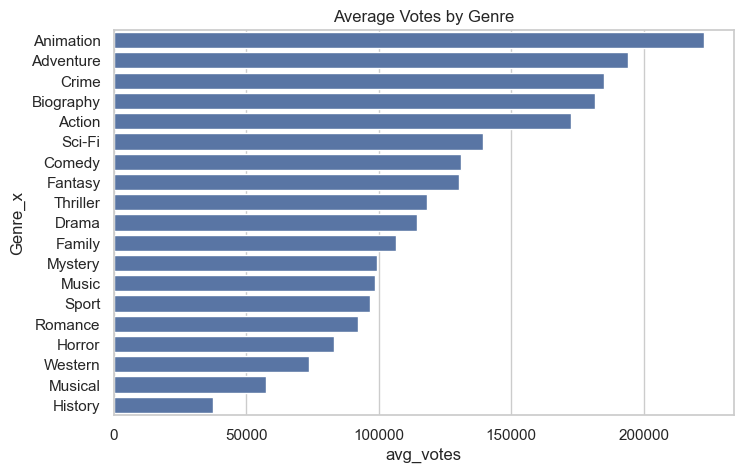

In [149]:
# Plot 2: Average Votes by Genre
plt.figure(figsize=(8, 5))
sns.barplot(x='avg_votes', y='Genre_x', data=genre_stats_by_votes)
plt.title('Average Votes by Genre')
plt.show()

In [153]:
# Plot 3: Average Box Office by Genre
plt.figure(figsize=(8, 5))
sns.barplot(x='avg_box_office_numeric', y='Genre_x', data=genre_stats)
plt.title('Average Box Office by Genre')
plt.show()

ValueError: Could not interpret value `avg_box_office_numeric` for `x`. An entry with this name does not appear in `data`.

<Figure size 800x500 with 0 Axes>